# Inf2 - Foundations of Data Science: Week 9 Workshop Exercise

**9 November 2020**

In [4]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.spatial import distance  # distance metrics

## Course characterisation

Fourth year students wanted to help 1st year students in the process of choosing optional courses. To do so, they gathered data on two variables for 20 courses: interest level, and difficulty level. Both variables are measured on a scale from 1-10, from easy to hard. The students wants to divide the courses to three groups, so  courses which are similar in both variables would be in the same group.

The following graph shows all courses. Each dot is a course, the x axis is the difficulty level and the y axis is the interest level of the course.

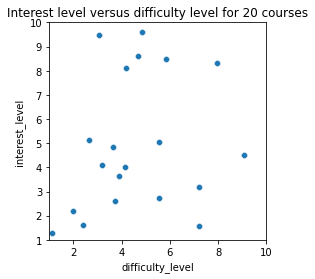

In [5]:
# read data
clustering_df = pd.read_csv('clustering_example_scale.csv')
# plot courses by difficulty and interest levels - each point is represents a course
ax = sns.scatterplot(x='difficulty_level', y='interest_level', data=clustering_df)
ax.set_xlim([1, 10])
ax.set_ylim([1, 10])
ax.set_aspect(1)
plt.title('Interest level versus difficulty level for 20 courses')
plt.show()

The students chose to use clustering methods that divide the data into groups. 

Nicole and Jennifer used two different clustering methods and got two different group arrangements, as shown in the graph below.

Like before, each dot represents a course. The colours represent different clusters. For example the orange group represents one cluster.

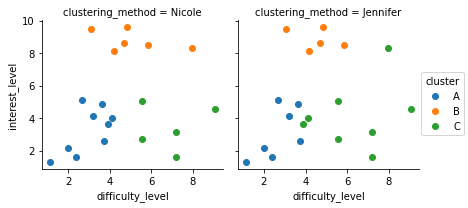

In [6]:
# get data only for Nicole and Jennifer
Nicole_Jennifer_clustering_df = clustering_df[clustering_df["clustering_method"].isin(['Nicole', 'Jennifer'])]

# plot the data
g = sns.FacetGrid(Nicole_Jennifer_clustering_df, col="clustering_method", hue="cluster")
g.map(plt.scatter, "difficulty_level", "interest_level")
g.add_legend(frameon=True);

### Exercise 1:

Which cluster ensemble seems better? Nicole's or Jennifer's?

Why?

Nicoles clustering is better. In particular, have a look at the two data points around (4,4) and the single data point at (8,8).

### Exercise 2:

Come up with a scoring measure (or multiple scoring measures) for how good a cluster is. 

This scoring measure needs to get as input all of the dots and the cluster they belong to, and give as output a numerical value.

You can come up with your own measure, or search for one. 

Just use MSE or RMSE.

Describe in words this grading measure, state the measure's purpose (what makes one cluster ensemble better than a different one), and how you would compute it.

1. The mean of the square distances of each point to its clusters centre.
2. A cluster A is better than a cluster B if, on average, its points are closer to its centre.
3. Sum up the squares of the distances and divide by the number of points.

Now, write code to compute your grading measure and test it on Nicole's and Jennifer's cluster ensamble.

You have two supporting functions at your disposal:
- A function that returns all points that belong to a specific cluster. Given all points, a clustering method, and the name of the specific cluster.
- A function that returns the distance between two points.

In [7]:
def get_all_points_in_cluster(clusters_df, cluster_name, clustering_method):
    '''
    This function gets as input a dataframe with clusters, the name of the clustering method 
    and the name of a cluster, and returns all points in that cluster as a numpy array
    '''
    # filter dataframe to get only points from the appropriate clustering method and appropriate cluster
    cluster_df = clusters_df[(clusters_df['cluster'] == cluster_name) & (clusters_df['clustering_method'] == clustering_method)]
    # get only the ranking columns
    cluster_points = cluster_df[['difficulty_level','interest_level']]
    # convert columns to numpy array
    cluster_points = cluster_points.values
    return cluster_points

In [8]:
# example use of 'get_all_points_in_cluster' - 
Jennifer_A_points = get_all_points_in_cluster(clustering_df,'A','Jennifer')
print(Jennifer_A_points)

[[1.13425738 1.2862267 ]
 [1.99519948 2.17617611]
 [2.40064391 1.61374775]
 [2.66863848 5.12427238]
 [3.1878366  4.10367405]
 [3.65565886 4.84288996]
 [3.73023531 2.61469753]]


In [13]:
# you can also use the 'distance.euclidean' function to get the distance between two points
# example use of euclidean distance:
distance_between_first_two_points = distance.euclidean(Jennifer_A_points[0], Jennifer_A_points[1])
#print(distance_between_first_two_points)
clustering_df.head(5)

,course,difficulty_level,interest_level,clustering_method,cluster
0,course1,1.134257,1.286227,Nicole,A
1,course2,1.995199,2.176176,Nicole,A
2,course3,2.400644,1.613748,Nicole,A
3,course4,2.668638,5.124272,Nicole,A
4,course5,3.085530,9.475858,Nicole,B


Write your scoring measure (or multiple scoring measures) in the next cells.

In [39]:
def measure_clustering_goodness_1(clustering_df, clustering_method):
    clustering_df = clustering_df[clustering_df['clustering_method'] == clustering_method]
    cluster_points = dict()
    for i in range(len(clustering_df.index)):
        row = clustering_df.iloc[i]
        cluster = row['cluster']
        x = row['difficulty_level']
        y = row['interest_level']
        cluster_points[cluster] = cluster_points.get(cluster, []) + [(x,y)]
    cluster_component_means = dict()
    for k in cluster_points.keys():
        x_comps = np.array(list(map(lambda x: x[0], cluster_points[k])))
        y_comps = np.array(list(map(lambda x: x[1], cluster_points[k])))
        cluster_component_means[k] = (np.mean(x_comps), np.mean(y_comps))
    s = 0
    for i in range(len(clustering_df.index)):
        row = clustering_df.iloc[i]
        cluster = row['cluster']
        x = row['difficulty_level']
        y = row['interest_level']
        s += distance.euclidean((x,y), cluster_component_means[cluster])  
    return s / len(clustering_df.index)  # TODO: replace with your code

In [8]:
def measure_clustering_goodness_2(clustering_df, clustering_method):
    pass  # TODO: replace with your code

In [9]:
def measure_clustering_goodness_3(clustering_df, clustering_method):
    pass  # TODO: replace with your code

Try your measures on Jennifer's and Nicole's clusters.
Do the measures agree with your thoughts in Ex 1?

In [40]:
# Jennifer's clustering score
print('Jennifer clustering score: ', measure_clustering_goodness_1(clustering_df, 'Jennifer'))

# Nicole's clustering score
print('Nicole clustering score: ', measure_clustering_goodness_1(clustering_df, 'Nicole'))

Jennifer clustering score:  1.7466757072771173
Nicole clustering score:  1.5145221933909803


### Exercise 3 (optional):

Repeat the clustering from a random initialisation by clicking `Ctrl-Enter` in the cell below. There are 2 parameters you can change:
- `n_init` - number of initialisations; 10 by default, but we've set it to 1
- `max_iter` - maximum number of iterations

What happens to the reliability of the clustering as you increase `n_init`? What happens if reduce `max_iter` to a low value (e.g. 2).

Sum of squared errors (interia) is 141.252406; number of iterations is 2


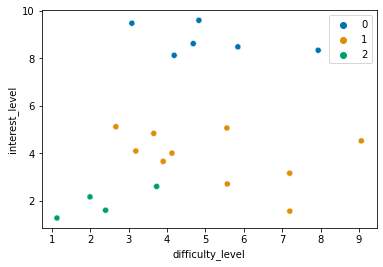

In [51]:
from sklearn.cluster import KMeans
X = clustering_df[['difficulty_level', 'interest_level']].to_numpy()
kmeans = KMeans(n_clusters=3, n_init=1, max_iter=2).fit(X)
sns.scatterplot(x='difficulty_level', y='interest_level',
                hue=kmeans.labels_, palette='colorblind', 
                data=clustering_df)
print('Sum of squared errors (interia) is %f; number of iterations is %d'%(kmeans.inertia_, kmeans.n_iter_))